In [2]:
import pandas as pd
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90


In [3]:
filename = r'/home/lucas/Projects/AnaliseDadosSRAG/INFLUD-30-06-2020.csv'
df = pd.read_csv(filename, delimiter=';', 
                 encoding='ISO-8859-1',
                 error_bad_lines=False)

/home/lucas/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (18,59,61,62,63,103,105,117,119,126,128,129,130,132) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.shape

(356188, 134)

In [5]:
for par in enumerate(df.columns): print (par)

(0, 'DT_NOTIFIC')
(1, 'SEM_NOT')
(2, 'DT_SIN_PRI')
(3, 'SEM_PRI')
(4, 'SG_UF_NOT')
(5, 'ID_REGIONA')
(6, 'CO_REGIONA')
(7, 'ID_MUNICIP')
(8, 'CO_MUN_NOT')
(9, 'ID_UNIDADE')
(10, 'CO_UNI_NOT')
(11, 'CS_SEXO')
(12, 'DT_NASC')
(13, 'NU_IDADE_N')
(14, 'TP_IDADE')
(15, 'COD_IDADE')
(16, 'CS_GESTANT')
(17, 'CS_RACA')
(18, 'CS_ETINIA')
(19, 'CS_ESCOL_N')
(20, 'ID_PAIS')
(21, 'CO_PAIS')
(22, 'SG_UF')
(23, 'ID_RG_RESI')
(24, 'CO_RG_RESI')
(25, 'ID_MN_RESI')
(26, 'CO_MUN_RES')
(27, 'CS_ZONA')
(28, 'SURTO_SG')
(29, 'NOSOCOMIAL')
(30, 'AVE_SUINO')
(31, 'FEBRE')
(32, 'TOSSE')
(33, 'GARGANTA')
(34, 'DISPNEIA')
(35, 'DESC_RESP')
(36, 'SATURACAO')
(37, 'DIARREIA')
(38, 'VOMITO')
(39, 'OUTRO_SIN')
(40, 'OUTRO_DES')
(41, 'PUERPERA')
(42, 'CARDIOPATI')
(43, 'HEMATOLOGI')
(44, 'SIND_DOWN')
(45, 'HEPATICA')
(46, 'ASMA')
(47, 'DIABETES')
(48, 'NEUROLOGIC')
(49, 'PNEUMOPATI')
(50, 'IMUNODEPRE')
(51, 'RENAL')
(52, 'OBESIDADE')
(53, 'OBES_IMC')
(54, 'OUT_MORBI')
(55, 'MORB_DESC')
(56, 'VACINA')
(57, 'DT_UT_DOS

In [6]:
troca_raça = {1:'Branca', 2:'Preta', 3:'Amarela',
              4:'Parda', 5:'Indígena', 9:'Ignorado'}
troca_escolaridade = {0:'Sem', 1:'Fund1', 
                      2:'Fund2', 3:'Médio',
                      4:'Superior', 
                      5:'Não se aplica',
                      9:'Ignorado'}

In [7]:
df.sample(10)

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ETINIA,CS_ESCOL_N,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,...,IF_PARA3,IF_ADENO,IF_OUTRO,DS_IF_OUT,PCR_RESUL,DT_PCR,POS_PCRFLU,TP_FLU_PCR,PCR_FLUASU,FLUASU_OUT,PCR_FLUBLI,FLUBLI_OUT,POS_PCROUT,PCR_VSR,PCR_PARA1,PCR_PARA2,PCR_PARA3,PCR_PARA4,PCR_ADENO,PCR_METAP,PCR_BOCA,PCR_RINO,PCR_OUTRO,DS_PCR_OUT,CLASSI_FIN,CLASSI_OUT,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,DT_DIGITA,HISTO_VGM,PAIS_VGM,CO_PS_VGM,LO_PS_VGM,DT_VGM,DT_RT_VGM,PCR_SARS2,PAC_COCBO,PAC_DSCBO
309182,10/06/2020,24,08/05/2020,19,CE,1 CRES FORTALEZA,1519.0,FORTALEZA,230440,HOSPITAL DE CAMPANHA COVID 19 HOSP PRESIDENTE ...,104477,F,21/07/1957,62,3,3062,5,4.0,NaN,NaN,BRASIL,1,CE,1 CRES FORTALEZA,1519.0,FORTALEZA,230440.0,1.0,2.0,2.0,9.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,21/06/2020,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257517,11/06/2020,24,27/04/2020,18,PA,01 REGIONAL DE PROTECAO SOCIAL,1484.0,BELEM,150140,SECRETARIA ESTADUAL DE SAUDE PUBLICA DO PARA,6628206,F,10/01/1980,40,3,3040,9,4.0,NaN,NaN,BRASIL,1,PA,01 REGIONAL DE PROTECAO SOCIAL,1484.0,MARITUBA,150442.0,2.0,1.0,2.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,06/05/2020,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,NaN,11/06/2020,11/06/2020,2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
124413,26/03/2020,13,20/03/2020,12,AM,ENTORNO DE MANAUS E RIO NEGRO,5584.0,MANAUS,130260,UNIMED MANAUS,9147047,M,11/05/1971,48,3,3048,6,1.0,NaN,4.0,BRASIL,1,AM,ENTORNO DE MANAUS E RIO NEGRO,5584.0,MANAUS,130260.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,...,NaN,NaN,NaN,NaN,2.0,30/03/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,1.0,28/03/2020,19/06/2020,12/05/2020,2,NaN,NaN,NaN,NaN,NaN,NaN,241005,ADVOGADO
102085,04/05/2020,19,30/04/2020,18,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,HOSPITAL GERAL DE PEDREIRA,2066092,F,25/02/1980,40,3,3040,5,1.0,NaN,3.0,BRASIL,1,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,...,NaN,NaN,NaN,NaN,3.0,08/05/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,02/06/2020,05/05/2020,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303962,18/06/2020,25,15/06/2020,25,SP,GVE X OSASCO,1335.0,SANTANA DE PARNAIBA,354730,HOSPITAL E MATERNIDADE MUNICIPAL SANTA ANA,2072513,F,05/08/1954,65,3,3065,5,4.0,NaN,1.0,BRASIL,1,SP,GVE X OSASCO,1335.0,SANTANA DE PARNAIBA,354730.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,1.0,24/06/2020,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,19/06/2020,2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
152724,11/05/2020,20,07/05/2020,19,RJ,NaN,NaN,RIO DE JANEIRO,330455,HOSPITAL NORTE DOR,6681573,M,12/05/1960,59,3,3059,6,1.0,NaN,9.0,BRASIL,1,RJ,NaN,NaN,RIO DE JANEIRO,330455.0,1.0,1.0,2.0,9.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,1.0,15/05/2020,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,1.0,1.0,NaN,19/05/2020,19/05/2020,2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
216685,29/05/2020,22,26/05/2020,22,PR,08RS FRANCISCO BELTRAO,1362.0,FRANCISCO BELTRAO,410840,POLICLINICA SAO VICENTE DE PAULA FB,2666723,F,16/11/1976,43,3,3043,5,1.0,NaN,3.0,BRASIL,1,PR,08RS FRANCISCO BELTRAO,1362.0,DOIS VIZINHOS,410720.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,NaN,NaN,NaN,NaN,2.0,01/06/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,1.0,1.0,01/06/2020,02/06/2020,02/06/2020,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23679,02/04/2020,14,01/04/2020,14,SP

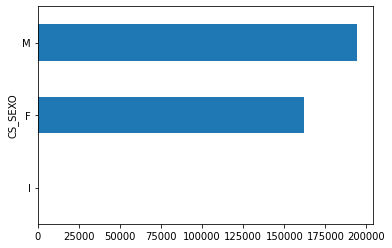

In [8]:
df.groupby('CS_SEXO').size().sort_values().plot(kind='barh')

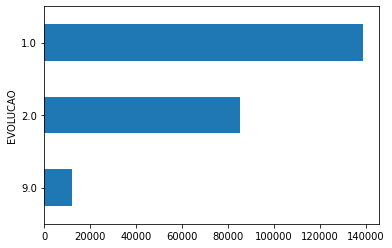

In [9]:
df.groupby('EVOLUCAO').size().sort_values().plot(kind='barh')

In [14]:
troca_evolucao = {1:'Cura', 2:'Óbito', 9:'Ignorado'}

In [15]:
df.loc[(df.EVOLUCAO.isnull()), 'EVOLUCAO'] = 9
df['EVOLUCAO'] = df['EVOLUCAO'].apply(lambda x : troca_evolucao[x])

KeyError: 'Curo'

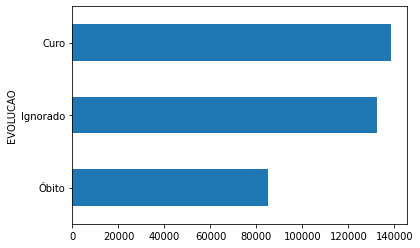

In [17]:
df.groupby('EVOLUCAO').size().sort_values().plot(kind='barh')

In [22]:
troca_zona = {1:"Urbana", 2: "Rural", 3:"Periurbana", 9:"Ignorado"}

In [24]:
df.loc[(df.CS_ZONA.isnull()), 'CS_ZONA'] = 9

In [28]:
df['CS_ZONA'] = df['CS_ZONA'].apply(lambda x : troca_zona[x])

KeyError: 'Urbana'

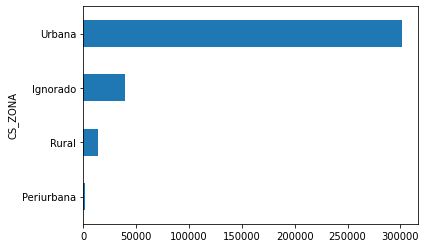

In [30]:
df.groupby('CS_ZONA').size().sort_values().plot(kind='barh')

In [34]:
df.query('FEBRE == 1')['FEBRE'].value_counts()

1.0    235820
Name: FEBRE, dtype: int64

In [36]:
df.query('TOSSE == 1')['TOSSE'].value_counts()

1.0    257719
Name: TOSSE, dtype: int64

In [39]:
df.query('GARGANTA == 1')['GARGANTA'].value_counts()

1.0    69257
Name: GARGANTA, dtype: int64

In [41]:
df.query('DESC_RESP == 1')['DESC_RESP'].value_counts()

1.0    206462
Name: DESC_RESP, dtype: int64

In [43]:
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

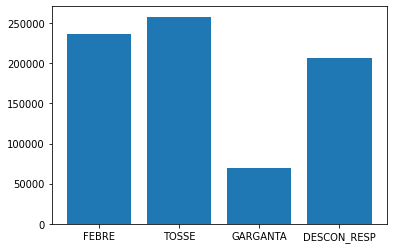

In [53]:
desc_resp = df.query('DESC_RESP == 1')['DESC_RESP'].value_counts().values[0]
garganta = df.query('GARGANTA == 1')['GARGANTA'].value_counts().values[0]
tosse = df.query('TOSSE == 1')['TOSSE'].value_counts().values[0]
febre = df.query('FEBRE == 1')['FEBRE'].value_counts().values[0]

values = [febre, tosse, garganta, desc_resp]
names = ['FEBRE','TOSSE', 'GARGANTA','DESCON_RESP']

plt.bar(names, values)

In [61]:
troca_ven = {1:"Sim, invasivo",2:"Sim, não invasivo",3:"Não",9:"Ignorado"}
df.loc[(df.SUPORT_VEN.isnull()), 'SUPORT_VEN'] = 9

In [63]:
df['SUPORT_VEN'] = df['SUPORT_VEN'].apply(lambda x : troca_ven[x])

KeyError: 'Ignorado'

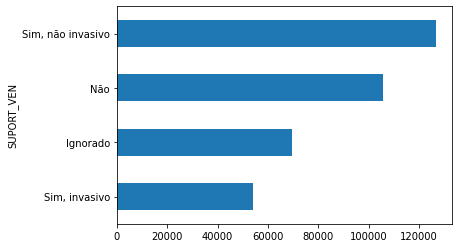

In [64]:
df.groupby('SUPORT_VEN').size().sort_values().plot(kind='barh')